# 7. Compare BaggingClassifier and AdaBoostClassifier


Task:
Use the sklearn BaggingClassifier and AdaBoostClassifier on the same dataset (like the Breast Cancer dataset).
Compare their accuracy, precision, and recall

In [1]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
boost_model = AdaBoostClassifier(n_estimators=50)

# Train
bag_model.fit(X_train, y_train)
boost_model.fit(X_train, y_train)

# Predict
bag_pred = bag_model.predict(X_test)
boost_pred = boost_model.predict(X_test)


for name, pred in zip(["Bagging", "AdaBoost"], [bag_pred, boost_pred]):
    print(f"{name} Accuracy:", accuracy_score(y_test, pred))
    print(f"{name} Precision:", precision_score(y_test, pred))
    print(f"{name} Recall:", recall_score(y_test, pred))
    print()

Bagging Accuracy: 0.9590643274853801
Bagging Precision: 0.963302752293578
Bagging Recall: 0.9722222222222222

AdaBoost Accuracy: 0.9766081871345029
AdaBoost Precision: 0.9814814814814815
AdaBoost Recall: 0.9814814814814815



 # 8.  Evaluate Model Performance on Imbalanced Data
Task:

Load an imbalanced dataset (e.g., from sklearn.datasets.make_classification)

Train a classifier (e.g., Random Forest)

Compute confusion matrix, precision, recall, F1-score

In [2]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[267   3]
 [ 12  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       270
           1       0.86      0.60      0.71        30

    accuracy                           0.95       300
   macro avg       0.91      0.79      0.84       300
weighted avg       0.95      0.95      0.95       300



#  9. Use XGBoost with Early Stopping
Task:

Train an XGBClassifier on a classification dataset

Use early_stopping_rounds and a validation set

Plot training vs validation error over iterations

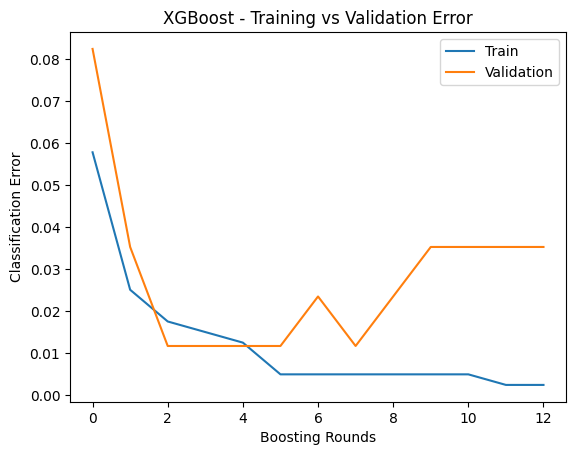

In [3]:
9.
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}
evals_result = {}

evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    evals_result=evals_result, 
    verbose_eval=False
)

epochs = len(evals_result['train']['error'])
x_axis = range(epochs)

plt.plot(x_axis, evals_result['train']['error'], label='Train')
plt.plot(x_axis, evals_result['val']['error'], label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Classification Error')
plt.title('XGBoost - Training vs Validation Error')
plt.legend()
plt.show()

# 10. Save and Load an Ensemble Model
Task:

Train a Random Forest model

Save it using joblib or pickle

Load it back and make predictions on test data

In [4]:
import joblib
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
joblib.dump(clf, 'rf_model.pkl')

loaded_model = joblib.load('rf_model.pkl')
predictions = loaded_model.predict(X_test)
print("Loaded model accuracy:", accuracy_score(y_test,predictions))

Loaded model accuracy: 0.9883720930232558


# 11. Handle Categorical Features with One-Hot Encoding in Ensembles
Task:

DATASET LINK:- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Load a dataset with categorical variables (like Titanic)

Preprocess using OneHotEncoder or pd.get_dummies()

Train a Gradient Boosting model and evaluate accuracy

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv(r"E:\Machine Learning\ML-Test\diabetes.csv")  

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.7532467532467533


# 18 . Implement Inheritance: Vehicle and Car
Task:

Create a base class Vehicle with attributes like brand, color

Create a derived class Car with additional attribute model

In [6]:
class Vehicle:
    def __init__(self, brand, color):  
        self.brand = brand
        self.color = color

class Car(Vehicle):
    def __init__(self, brand, color, model):  
        super().__init__(brand, color)       
        self.model = model

car = Car("Toyota", "Red", "Corolla")
print(car.brand, car.color, car.model)


Toyota Red Corolla


# 19 Encapsulation to Protect Data
Task:

Create a class Student with a private attribute __marks

In [7]:
class Student:
    def __init__(self, marks):  
        self.__marks = marks  

    def get_marks(self):
        return self.__marks

    def set_marks(self, marks):
        self.__marks = marks

s = Student(90)
print(s.get_marks())
s.set_marks(95)
print(s.get_marks())


90
95


# 21.  Multiple Inheritance Example
Task:

Create class Father, class Mother, and derived class Child

Add attributes to both parents, access them in Child

In [8]:
# Define Father class
class Father:
    def __init__(self, father_name, father_age):  # Fixed __init__
        self.father_name = father_name
        self.father_age = father_age

    def display_father_info(self):
        print(f"Father's Name: {self.father_name}")
        print(f"Father's Age: {self.father_age}")

class Mother:
    def __init__(self, mother_name, mother_age):  # Fixed __init__
        self.mother_name = mother_name
        self.mother_age = mother_age

    def display_mother_info(self):
        print(f"Mother's Name: {self.mother_name}")
        print(f"Mother's Age: {self.mother_age}")

class Child(Father, Mother):
    def __init__(self, father_name, father_age, mother_name, mother_age, child_name):  # Fixed __init__
        Father.__init__(self, father_name, father_age)
        Mother.__init__(self, mother_name, mother_age)
        self.child_name = child_name

    def display_child_info(self):
        print(f"Child's Name: {self.child_name}")
        self.display_father_info()
        self.display_mother_info()

# Creating Child object
child = Child(father_name="John", father_age=45, mother_name="Mary", mother_age=42, child_name="Alice")

child.display_child_info()


Child's Name: Alice
Father's Name: John
Father's Age: 45
Mother's Name: Mary
Mother's Age: 42
